In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression

/Users/stuartclark/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
np.random.seed(121)

In [5]:
X = np.random.randint(100, size=20)

In [6]:
X

array([66, 85,  8, 95, 65, 52, 83, 96, 46, 34, 52, 60, 54,  3, 94, 52, 57,
       75, 88, 39])

In [7]:
X = np.sort(X)
print 'X: %s' %(X)

X: [ 3  8 34 39 46 52 52 52 54 57 60 65 66 75 83 85 88 94 95 96]


In [9]:
mu = np.mean(X)
print 'Mean of X:', mu
gmu = stats.gmean(X)
print 'Geomtric Mean of X:', gmu

Mean of X: 60.2
Geomtric Mean of X: 49.0544229871


In [ ]:
print 'Range of X: %s' %(np.ptp(X))

In [10]:
abs_dispersion = [np.abs(mu - x) for x in X]
MAD = np.sum(abs_dispersion)/len(abs_dispersion)
print 'Mean absolute deviation of X:', MAD

Mean absolute deviation of X: 20.52


In [11]:
print 'Variance of X:', np.var(X)
print 'Standard deviation of X:', np.std(X)

Variance of X: 670.16
Standard deviation of X: 25.8874486962


In [12]:
lows = [e for e in X if e <= mu]
print 'Values less than the arithmetic mean of:',mu, ' are: ', lows

semivar = np.sum( (lows - mu) ** 2 ) / len(lows)
print 'Semivariance of X:', semivar
print 'Semideviation of X:', np.sqrt(semivar)

Values less than the arithmetic mean of: 60.2  are:  [3, 8, 34, 39, 46, 52, 52, 52, 54, 57, 60]
Semivariance of X: 689.512727273
Semideviation of X: 26.2585743572


In [ ]:
lows

In [13]:
import scipy.stats as stats
# Scipy has a built-in mode function, but it will return exactly one value
# even if two values occur the same number of times, or if no value appears more than once


# So we will write our own
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.iteritems():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

In [14]:
import quandl

In [15]:
data = quandl.get("XLON/ISF", authtoken="QsKTz-DKDc3se9CA89VL")

In [16]:
returns=data['Close'].pct_change()[1:]

In [17]:
hist, bins = np.histogram(returns, 20) 

In [18]:
maxfreq = max(hist)

In [19]:
# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print 'Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq]

Mode of bins: [(-0.003698779810052108, 0.0052026569122691768)]


Skew: 0.0944803307901
Mean: 0.000263362885886
Median: 0.000250439161997


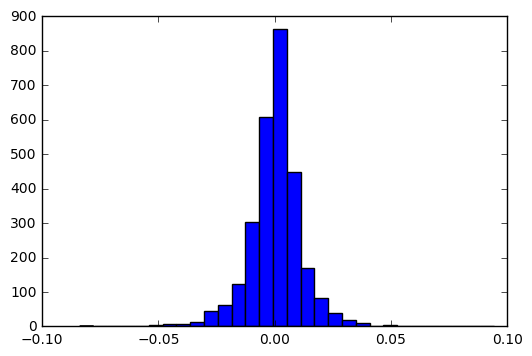

In [27]:
print 'Skew:', stats.skew(returns)
print 'Mean:', np.mean(returns)
print 'Median:', np.median(returns)
%matplotlib inline
plt.hist(returns, 30);

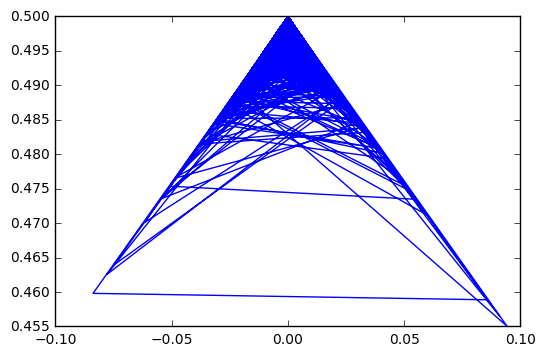

In [28]:
plt.plot(returns,stats.laplace.pdf(returns), label='Leptokurtic')

In [56]:
quandl.get("XLON/SKY",start_date=start,column_index="Close", end_date=end,authtoken="QsKTz-DKDc3se9CA89VL")

,Close
Date,
2014-01-01,755.652765
2014-01-02,755.205103
2014-01-03,750.280825
2014-01-06,748.490179
2014-01-07,752.519133
2014-01-08,754.757441
2014-01-09,738.193963
2014-01-10,751.176149
2014-01-13,751.623810


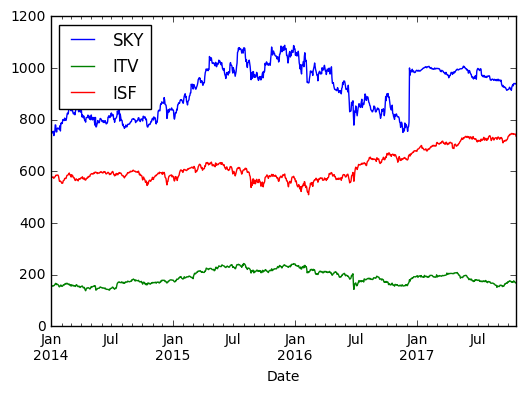

In [143]:
start = '2014-01-01'
end = '2017-10-25'
sym = ['SKY','ITV','ISF']
qc = 'XLON/'
fields = [qc + x for x in sym]
prices=quandl.get(fields, column_index="Close",start_date=start, end_date=end,authtoken="QsKTz-DKDc3se9CA89VL")
prices.columns = sym
prices.head()
prices.plot()

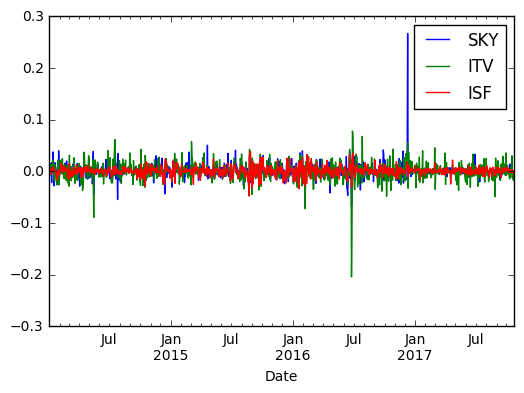

In [142]:
returns = prices.pct_change()[1:]
returns.head()
returns.plot()

In [153]:
returns.where(returns['SKY'] > 0.05).dropna()

,SKY,ITV,ISF
Date,,,
2015-04-21,0.050380,0.007862,0.001277
2016-12-09,0.266624,0.055096,0.003765


In [157]:
returns.max()

SKY    0.266624
ITV    0.077922
ISF    0.038410
dtype: float64

In [140]:
rets_correlation=returns.corr()
rets_correlation

,SKY,ITV,ISF
SKY,1.000000,0.476621,0.455857
ITV,0.476621,1.000000,0.504463
ISF,0.455857,0.504463,1.000000


In [141]:
price_correlation=prices.corr()
price_correlation

,SKY,ITV,ISF
SKY,1.000000,0.824585,0.224895
ITV,0.824585,1.000000,-0.170185
ISF,0.224895,-0.170185,1.000000


In [130]:
# First, run a linear regression on the two assets
slr = regression.linear_model.OLS(prices.iloc[:,0], sm.add_constant(prices.iloc[:,1])).fit()
print 'SLR beta of asset2:', slr.params[1]

SLR beta of asset2: 2.81148042444


In [131]:
# Run multiple linear regression using asset2 and SPY as independent variables
mlr = regression.linear_model.OLS(prices.iloc[:,0], sm.add_constant(np.column_stack((prices.iloc[:,1], prices.iloc[:,2])))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*prices.iloc[:,2]
prediction.name = 'Prediction'

print 'MLR beta of asset2:', mlr.params[1], '\nMLR beta of S&P 500:', mlr.params[2]

MLR beta of asset2: 3.02972671268 
MLR beta of S&P 500: 0.600813917368


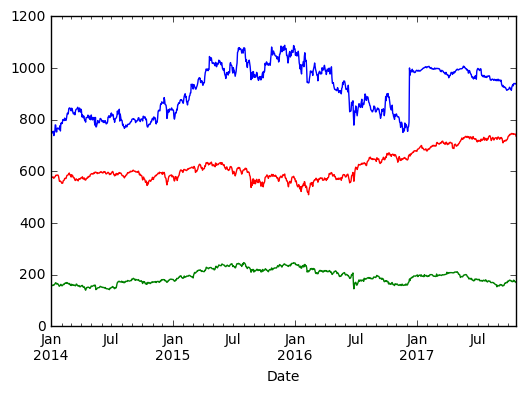

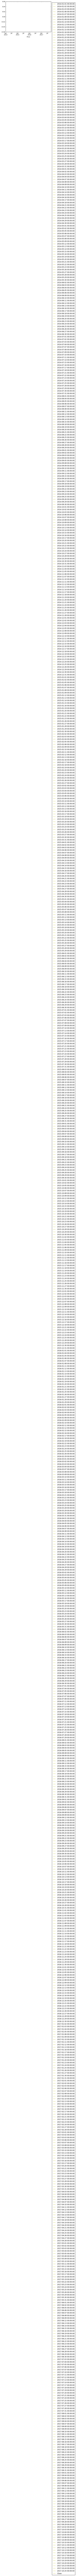

In [133]:
# Plot the three variables along with the prediction given by the MLR
prices.iloc[:,0].plot()
prices.iloc[:,1].plot()
prices.iloc[:,2].plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2);